# CNN Model to classify images in the CIFAR dataset

## Import Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Download and prepare the CIFAR10 dataset

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape

(50000, 32, 32, 3)

## Verify the data

Plot the first 25 images from the training set and display the class names

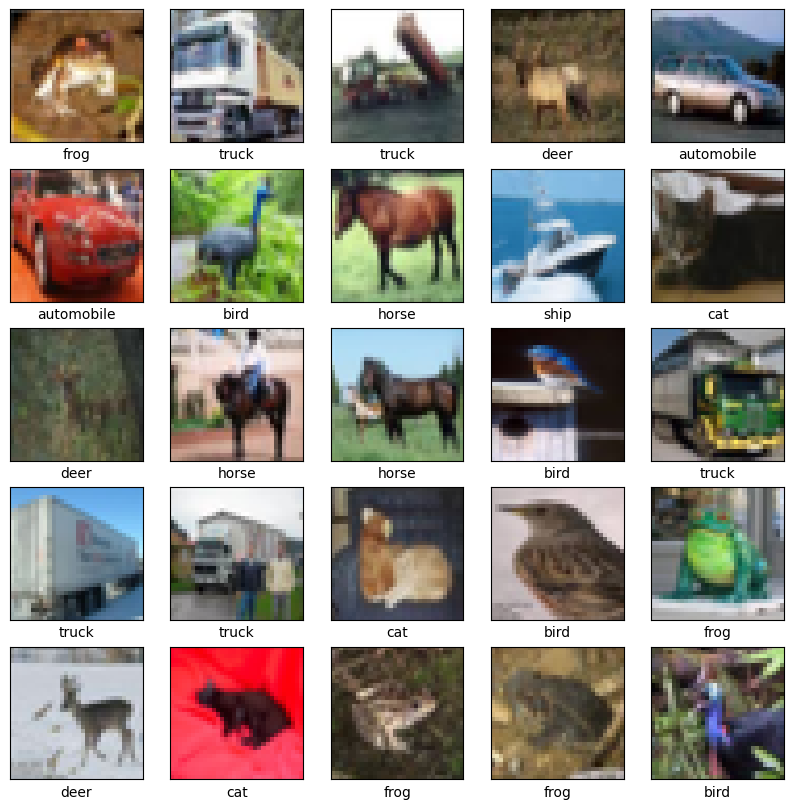

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

### Create the convolutional base

Create base using a simple common pattern, stack f Conv2D and MaxPooling2D layers.

The input shape is (32, 32, 3) which is the format of the CIFAR images. This input shape is passed to the first layer (image_height, image_width, color_channels).

In [14]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(2, 2),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPool2D(2, 2),
    DefaultConv2D(filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

### Compile and train the model

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.4228 - loss: 1.5853 - val_accuracy: 0.6350 - val_loss: 1.0443
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - accuracy: 0.6678 - loss: 0.9387 - val_accuracy: 0.6924 - val_loss: 0.8902
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 77ms/step - accuracy: 0.7354 - loss: 0.7483 - val_accuracy: 0.7200 - val_loss: 0.8036
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 77ms/step - accuracy: 0.7779 - loss: 0.6279 - val_accuracy: 0.7217 - val_loss: 0.8313
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 79ms/step - accuracy: 0.8115 - loss: 0.5348 - val_accuracy: 0.7276 - val_loss: 0.8154
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8391 - loss: 0.4550 - val_accuracy: 0.7315 - val_loss: 0.8339
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.8624 - loss: 0.3884 - val_accuracy: 0.7196 - val_loss: 0.8959
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 

### Evaluate the model

313/313 - 7s - 23ms/step - accuracy: 0.7149 - loss: 1.1595


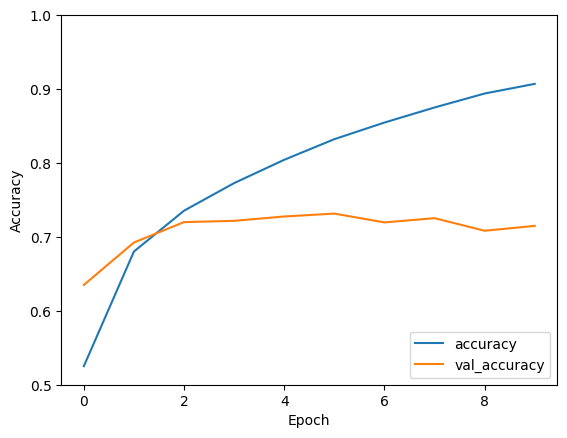

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [17]:
print(test_acc)

0.714900016784668


In [18]:
predicted_labels = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


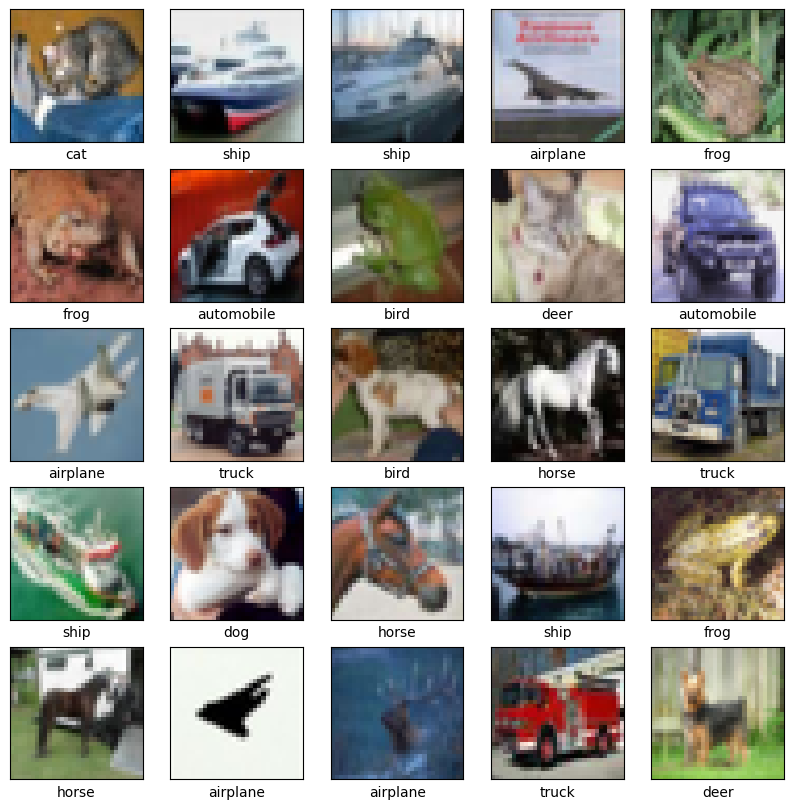

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[predicted_labels[i]])